# Preprocessing

In [33]:
# Import here Needed Libraries
import pandas as pd
import numpy as np

In [34]:
# Data Loading
df = pd.read_csv(r"D:\CS-IEEE-ZSB-26-AI\Task2\Mart_Sales.csv")

In [35]:
# show first and last 5 rows
print(df.head())   
print(df.tail())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [36]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
# shape of the data
df.shape

(8523, 12)

In [38]:
# Describe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

Before doing anything, find out where the "missing" in the data are

In [39]:
# check missing values
print('#Cat_Col:',df.select_dtypes(include=object).shape[1])
print('#Num_Col:' ,df.select_dtypes(include=['Int64', 'float64']).shape[1])

#Cat_Col: 7
#Num_Col: 5


okay now we found number of missing values

- <b> features to be removed ---> 80%  is nan
- <b> features to filled --------> less than 80 %
- <b> observation to be removed --> less than 3%

In [40]:
# percentage of the missing values
null_percentage = df.isnull().mean()
null_percentage

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [50]:
# Okay both of the missing 2 columns are numerical column, Categorial so what do you think we will fill the 2 Null values columns with????
# # if null count is > 3% and < 80%  fill it by mean
# if null count is < 3% remove this row that contain this null value
def handle_nulls(df):
    df = df.copy()

    null_percentage = df.isnull().mean()
    f_to_be_removed = list(null_percentage[null_percentage >= 0.80].index)
    df = df.loc[:, null_percentage < 0.80]

    null_percentage = df.isnull().mean()
    f_to_be_filled = list(null_percentage[(null_percentage >= 0.03) & (null_percentage < 0.80)].index)
    for col in f_to_be_filled:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

    obs_to_be_removed = list(null_percentage[null_percentage < 0.03].index)
    df.dropna(subset=obs_to_be_removed, inplace=True)

    return df, f_to_be_removed, f_to_be_filled, obs_to_be_removed

df, f_removed, f_filled, obs_removed = handle_nulls(df)

print("#>>>f_to_be_removed:", f_removed)
print("#>>>f_to_be_filled:", f_filled)
print("#>>>obs_to_be_removed:", obs_removed)

#>>>f_to_be_removed: []
#>>>f_to_be_filled: ['Item_Weight', 'Outlet_Size']
#>>>obs_to_be_removed: ['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


C:\Users\user\AppData\Local\Temp\ipykernel_21184\2705247589.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_21184\2705247589.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [51]:
# lets check if the missing values are filled or not
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [52]:
# Okay now lets check if there is duplicates in the data
df.duplicated().sum()

np.int64(0)

# Handling outliers

know we will check for the outliers and we will trys 2 ways.

how the boxplot visualize
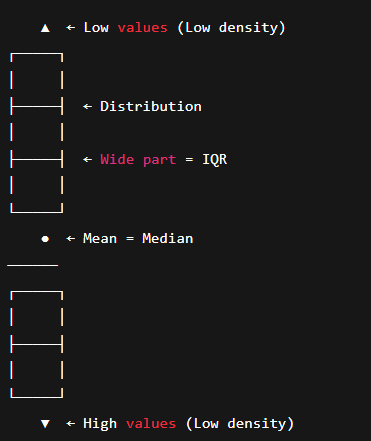

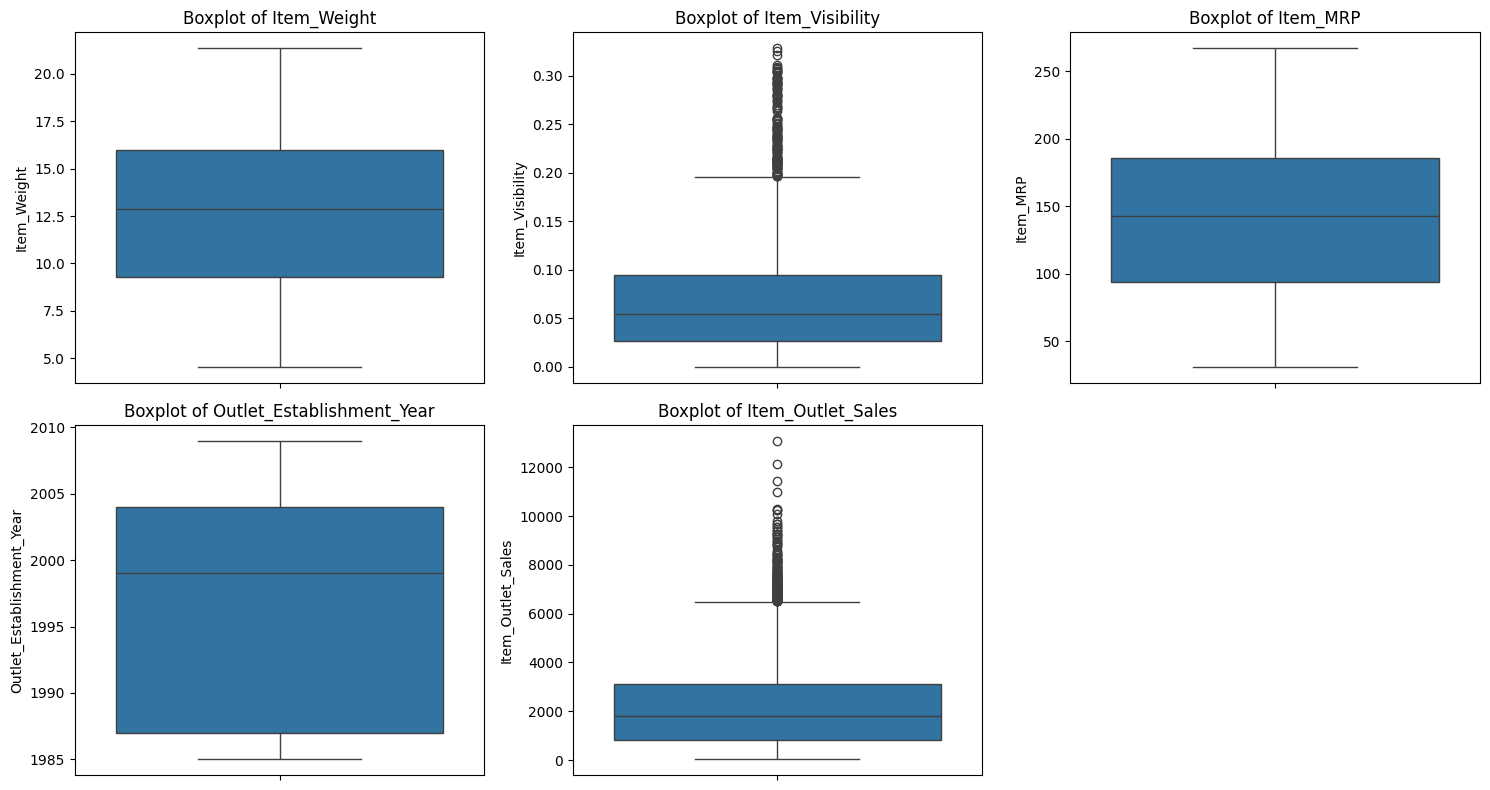

In [54]:
#Boxplot Method (Visualization)
# don't forget to make sure that while using boxplot or checking the outliers you can't pass any categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP',
                    'Outlet_Establishment_Year','Item_Outlet_Sales']

plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [56]:
#IQR Method
def iqr_method(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

now you will see 2 columns with outliers and we will try to handle oultiers in those 2 columns

In [57]:
# Handling Outliers using IQR Method
# Two ways:
# Deleting rows  --> Use when outliers % is small (<5%)
# Capping values --> Use in production to avoid data loss

##oultiers_column = ['Item_Outlet_Sales','Item_Visibility']

    # CAPPING OUTLIERS (SAFE METHOD)
    # Use When:
    # - You don't want to lose data
    # - Working in production
    # - Column has important extreme values
    # df[col] = df[col].clip(lower, upper)
    # print(f"{col} cleaned using capping method")
col = 'Item_Outlet_Sales'
lower, upper = iqr_method(df, col)
df[col] = df[col].clip(lower, upper)

    # DELETING OUTLIERS (WORKING)
    # Use when:
    # - Dataset is large
    # - Outliers percentage is very small
    # - Column is NOT target variable
col = 'Item_Visibility'
lower, upper = iqr_method(df, col)
df = df[(df[col] >= lower) & (df[col] <= upper)]

# Skewness Handling


In [58]:
# N = number of rows
# N = train_data.shape[0]

# Calculate skewness for numeric features
def feature_skewness(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    N = df.shape[0]
    
    skew_dict = {}
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        skew = ((df[col] - mean)**3).sum() / ((N - 1) * std**3)
        skew_dict[col] = skew
        
    return pd.Series(skew_dict, name="Skewness")

skew_values = feature_skewness(df)
print(skew_values)

Item_Weight                  0.089838
Item_Visibility              0.737977
Item_MRP                     0.128984
Outlet_Establishment_Year   -0.414712
Item_Outlet_Sales            0.863634
Name: Skewness, dtype: float64


In [59]:
# Apply log transformation for features with |skewness| > 1
def log_transform_skewed(df, threshold=1):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    transformed_features = []

    for col in num_cols:
        if abs(df[col].skew()) > threshold:
            df[col] = np.log1p(df[col])
            transformed_features.append(col)

    return df, transformed_features


df, log_features = log_transform_skewed(df)
print("Features is log_Transformed :")
for f in log_features:
    print(f)

Features is log_Transformed :


# Encoding Categorical columns

In [ ]:
#Encode categorical features with label encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

In [61]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])